   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


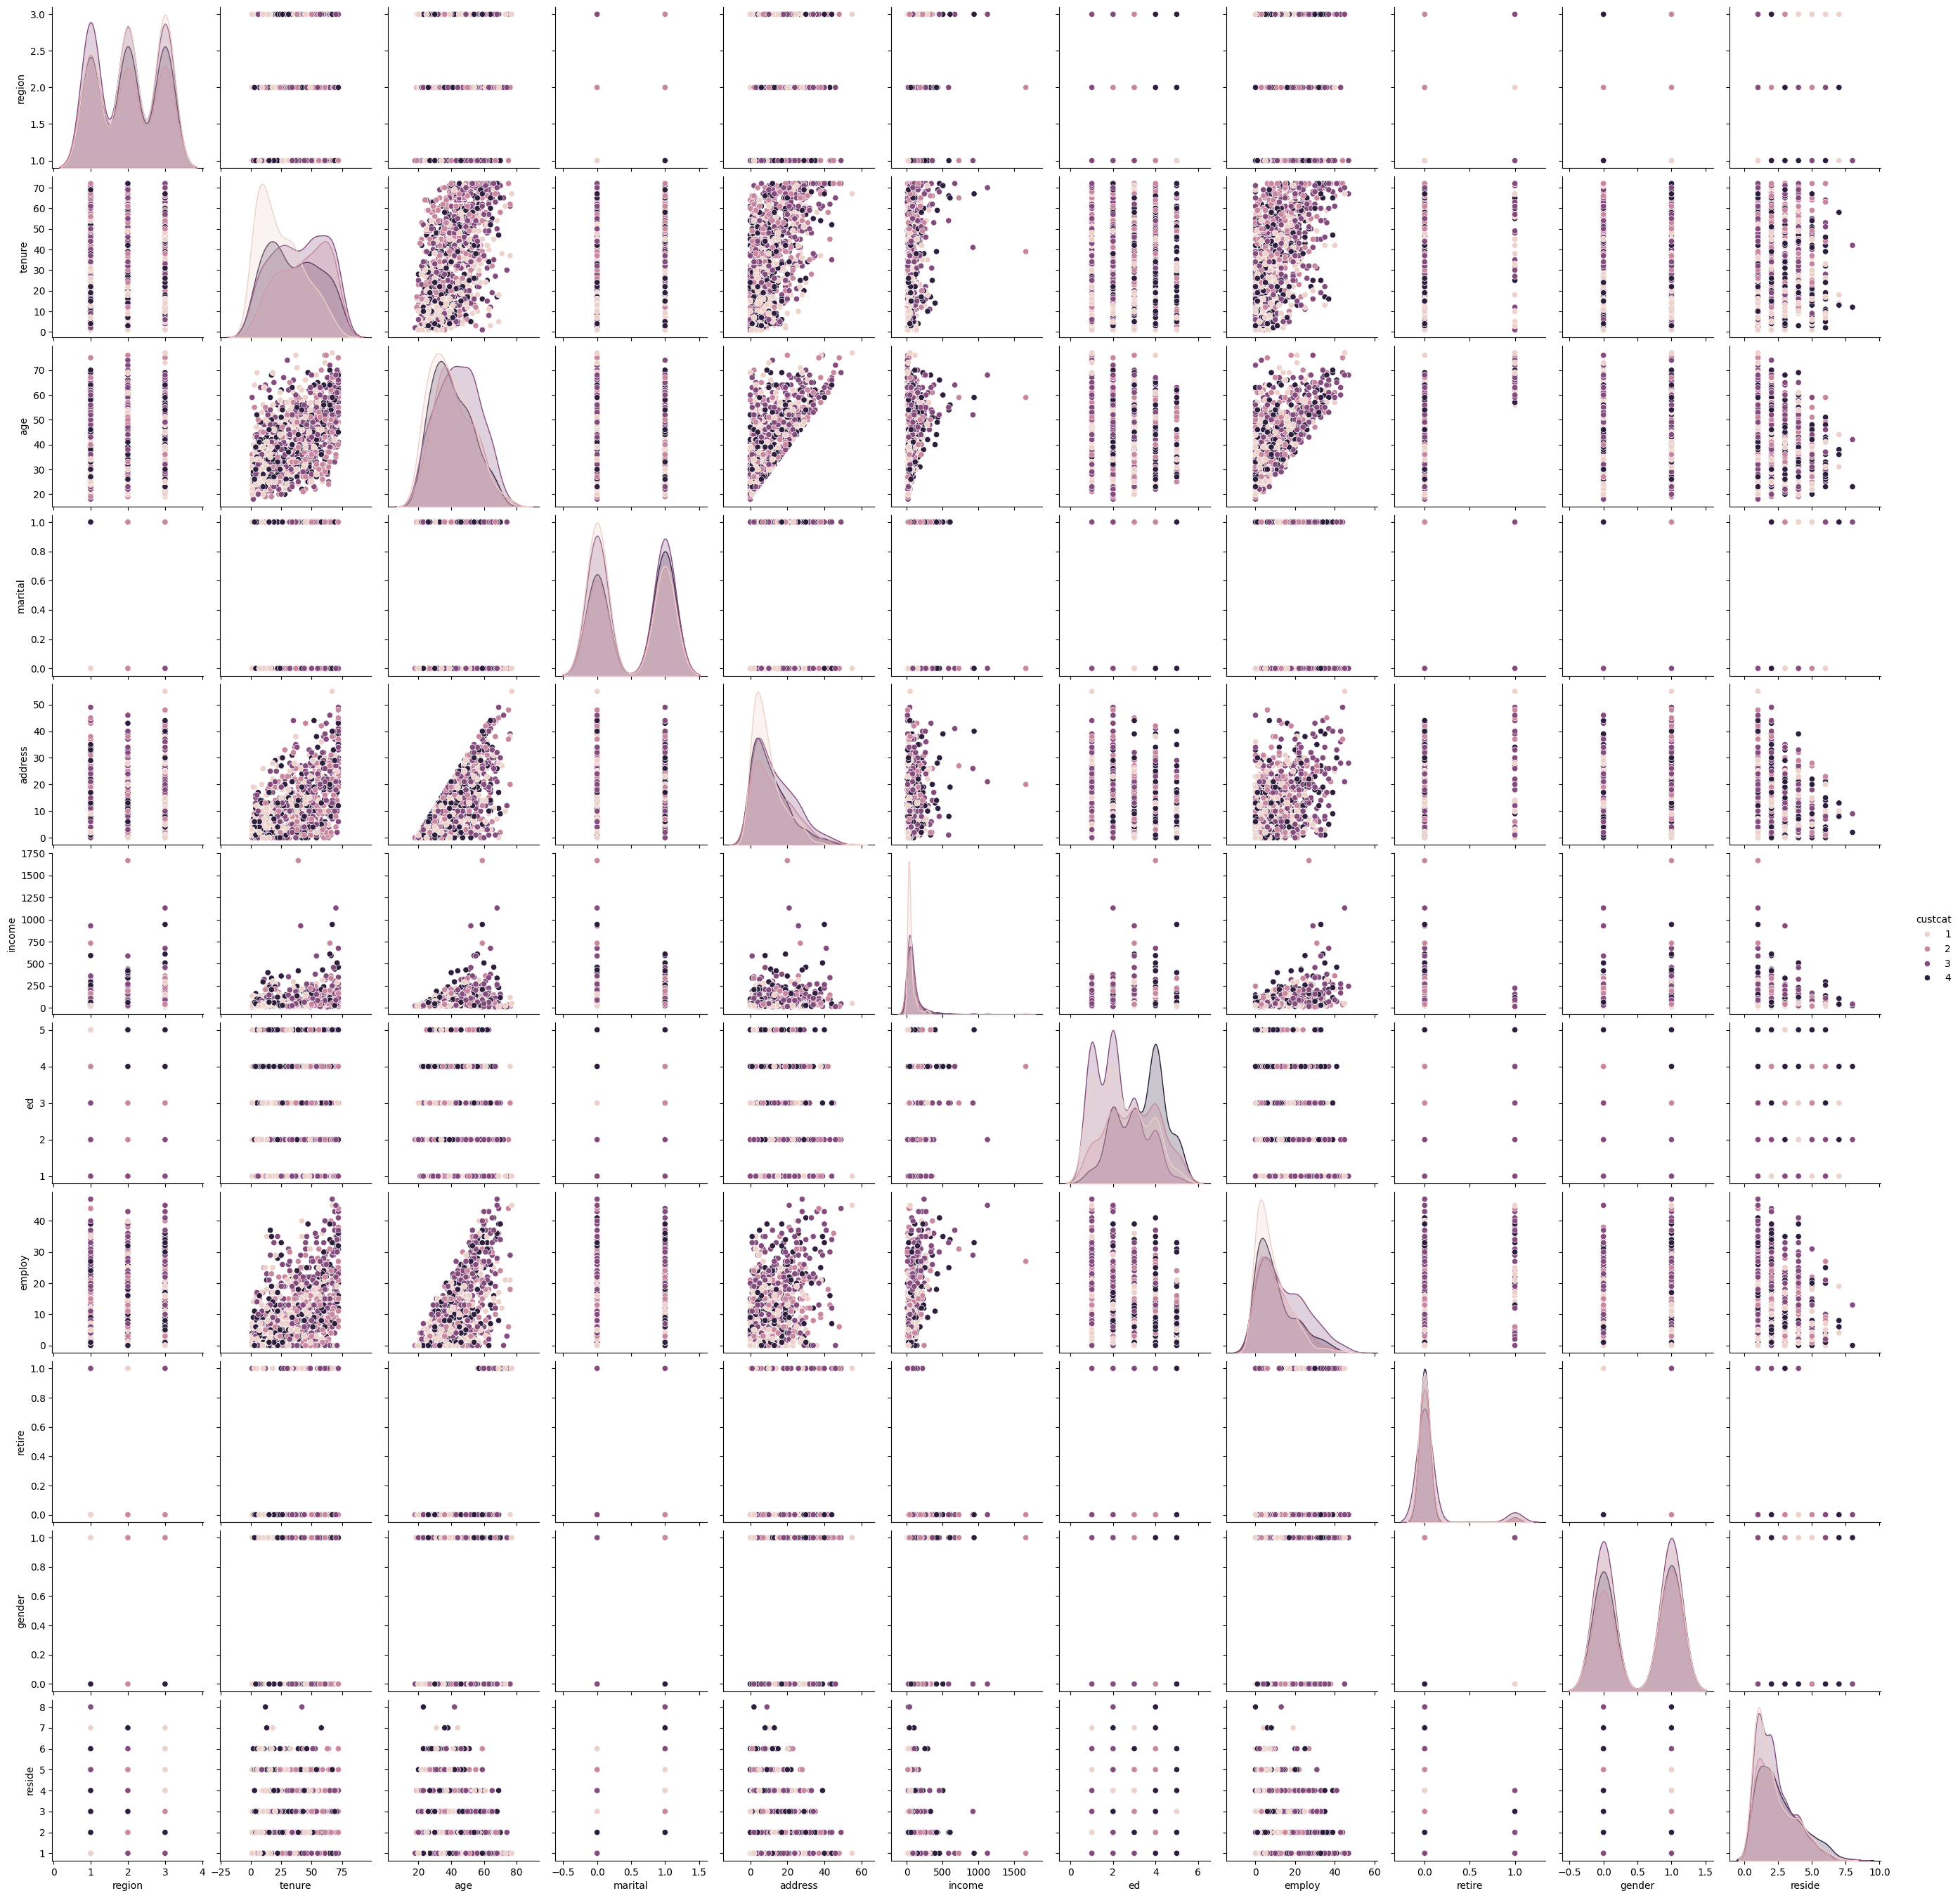

Confusion Matrix:
[[30 11 14  5]
 [13 10  9  7]
 [18 13 18  6]
 [17  9 11  9]]

Classification Report:
              precision    recall  f1-score   support

           1       0.38      0.50      0.43        60
           2       0.23      0.26      0.24        39
           3       0.35      0.33      0.34        55
           4       0.33      0.20      0.25        46

    accuracy                           0.34       200
   macro avg       0.32      0.32      0.32       200
weighted avg       0.33      0.34      0.33       200


Accuracy Score:
0.335


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
file_path = '/content/data/teleCust1000t.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Basic data visualization
sns.pairplot(data, hue='custcat')
plt.show()

# Prepare the data for training
X = data.drop('custcat', axis=1)
y = data['custcat']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
